In [22]:
from owslib.wms import WebMapService
from IPython.core.display import HTML
from IPython.display import Image


In [6]:
wms = WebMapService('http://gms.invu.go.cr/geoserver/wms')
print("Title: ", wms.identification.title)
print("Type: ", wms.identification.type)
print("Operations: ", [op.name for op in wms.operations])
print("GetMap options: ", wms.getOperationByName('GetMap').formatOptions)
wms.contents.keys()

Title:  None
Type:  OGC:WMS
Operations:  ['GetCapabilities', 'GetMap', 'GetFeatureInfo', 'DescribeLayer', 'GetLegendGraphic', 'GetStyles']
GetMap options:  ['image/png', 'application/atom xml', 'application/atom+xml', 'application/json;type=utfgrid', 'application/openlayers', 'application/pdf', 'application/rss xml', 'application/rss+xml', 'application/vnd.google-earth.kml', 'application/vnd.google-earth.kml xml', 'application/vnd.google-earth.kml+xml', 'application/vnd.google-earth.kml+xml;mode=networklink', 'application/vnd.google-earth.kmz', 'application/vnd.google-earth.kmz xml', 'application/vnd.google-earth.kmz+xml', 'application/vnd.google-earth.kmz;mode=networklink', 'atom', 'image/geotiff', 'image/geotiff8', 'image/gif', 'image/gif;subtype=animated', 'image/jpeg', 'image/png8', 'image/png; mode=8bit', 'image/svg', 'image/svg xml', 'image/svg+xml', 'image/tiff', 'image/tiff8', 'image/vnd.jpeg-png', 'kml', 'kmz', 'openlayers', 'rss', 'text/html; subtype=openlayers', 'utfgrid']


odict_keys(['planes:210_San_Carlos', 'planes:301_Cartago', 'planes:306_Alvarado', 'planes:307_Oreamuno', 'planes:501_Liberia', 'planes:Planes reguladores Mayo 2018', 'UFIS:_101C', 'ict:area_influencia_papagayo', 'invu-pnud:area_proteccion_rio_maria_aguilar', 'ict:centros_desarrollo_turistico', 'ict:declaratorias_zmt', 'ict:ubicacion_pr_zmt', 'ict:unidades_planeamiento_turistico'])

In [16]:
for key in ['planes:210_San_Carlos', 'planes:301_Cartago', 'planes:306_Alvarado', 'planes:307_Oreamuno', 'planes:501_Liberia',
            'planes:Planes reguladores Mayo 2018', 'UFIS:_101C', 'ict:area_influencia_papagayo',
            'invu-pnud:area_proteccion_rio_maria_aguilar', 'ict:centros_desarrollo_turistico', 'ict:declaratorias_zmt', 
            'ict:ubicacion_pr_zmt', 'ict:unidades_planeamiento_turistico']:
    print(wms.contents[key].title)

San_Carlos
Cartago
Alvarado
Oreamuno
Liberia
Estado Planes reguladores Mayo 2018
_101C
Área delimitación proyecto Papagayo
Area de Protección del Rio María Aguilar
Centros de Desarrollo Turístico
Declaratoria ZMT
Ubicación de planes reguladores en ZMT
Unidades de planeamiento turístico


In [40]:
# NBVAL_IGNORE_OUTPUT

name = 'planes:Planes reguladores Mayo 2018'
layer = wms.contents[name]
print("Abstract: ", layer.abstract)
print("BBox: ", layer.boundingBoxWGS84)
print("CRS: ", layer.crsOptions)
print("Styles: ", layer.styles)
print("Timestamps: ", layer.timepositions)
HTML(layer.parent.abstract)

Abstract:  El INVU publica esta base de datos  con la información del estado de los planes reguladores a nivel cantonal, se incluye la cobertura a nivel cantonal, el área que corresponde del plan regulador, el estado legal del plan regulador, la publicación en el diario oficial La Gaceta, la modificación o actualización del plan regulador, la existencia de estudios hidrogeológicos y de la variable ambiental, junto con las resoluciones institucionales
BBox:  (-90.03524486090275, 0.9237145858411105, -77.89331765370879, 13.065641793035065)
CRS:  ['EPSG:61566405', 'EPSG:62786405', 'EPSG:21896', 'EPSG:4094', 'EPSG:28465', 'EPSG:2639', 'EPSG:4689', 'EPSG:5624', 'EPSG:27592', 'EPSG:2265', 'EPSG:3027', 'EPSG:2230', 'EPSG:63136405', 'EPSG:6802', 'EPSG:61286405', 'EPSG:2523', 'EPSG:2631', 'EPSG:2975', 'EPSG:3272', 'EPSG:24378', 'EPSG:4025', 'EPSG:5927', 'EPSG:2314', 'EPSG:22291', 'EPSG:6115', 'EPSG:62076405', 'EPSG:3541', 'EPSG:4507', 'EPSG:30171', 'EPSG:6546', 'EPSG:26778', 'EPSG:5373', 'EPSG:3

<IPython.core.display.HTML object>

In [44]:
response = wms.getmap(layers=[name,],
                style="rgb",
                 bbox=(-90.03524486090275, 0.9237145858411105, -77.89331765370879, 13.065641793035065), # Left, bottom, right, top
                 format='image/png',
                 size=(600,600),
                 srs='EPSG:4326',
                 time='2018-09-16',
                 transparent=True)
response

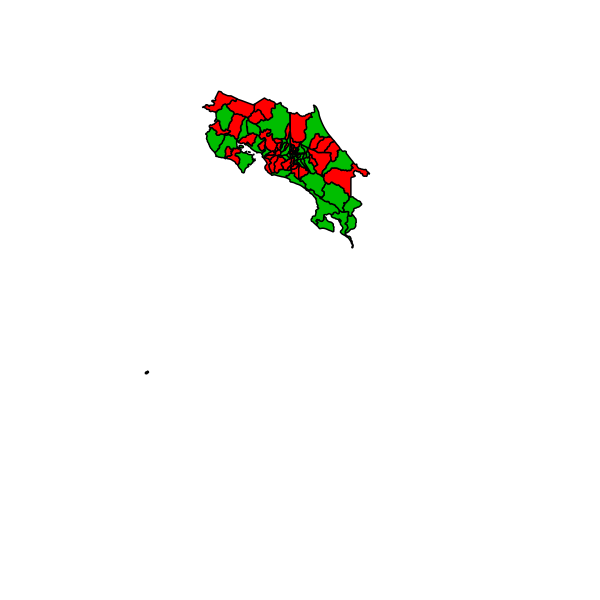

In [45]:
Image(response.read())